In [1]:
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from pathlib import Path

import opinion_model as om
import bifurcation as bfc
import simulations as sim

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# APS matplotlib style library (https://github.com/hosilva/physrev_mplstyle)
%matplotlib inline
%config InlineBackend.figure_format='retina' # Optional

plt.style.use('physrev.mplstyle') # Set full path to if physrev.mplstyle is not in the same in directory as the notebook
plt.rcParams['figure.dpi'] = "300"

# mpl.rcParams['axes.labelsize']

### **Figure 2**
$\alpha$-Bifurcation Diagram and $(\alpha, \gamma)$-Bifurcation Diagram

In [3]:
# Define parameter values
beta = 0.6
gamma = 4
M = 1
x_range = np.linspace(0.01, M, 100)

/Users/tim/Library/CloudStorage/GoogleDrive-tim.mauch1@gmail.com/My Drive/Wissen/Master Thesis/Veröffentlichung/Python Code/bifurcation.py:230: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax[0].plot(alpha_start, x_start, 'ro', markersize=4, color="#eb0909")
/Users/tim/Library/CloudStorage/GoogleDrive-tim.mauch1@gmail.com/My Drive/Wissen/Master Thesis/Veröffentlichung/Python Code/bifurcation.py:242: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax[1].plot(alpha_start, gamma, 'ro', markersize=4, color="#eb0909")


File single_patch_bifurcation.pdf already exists in figures, skipping save.


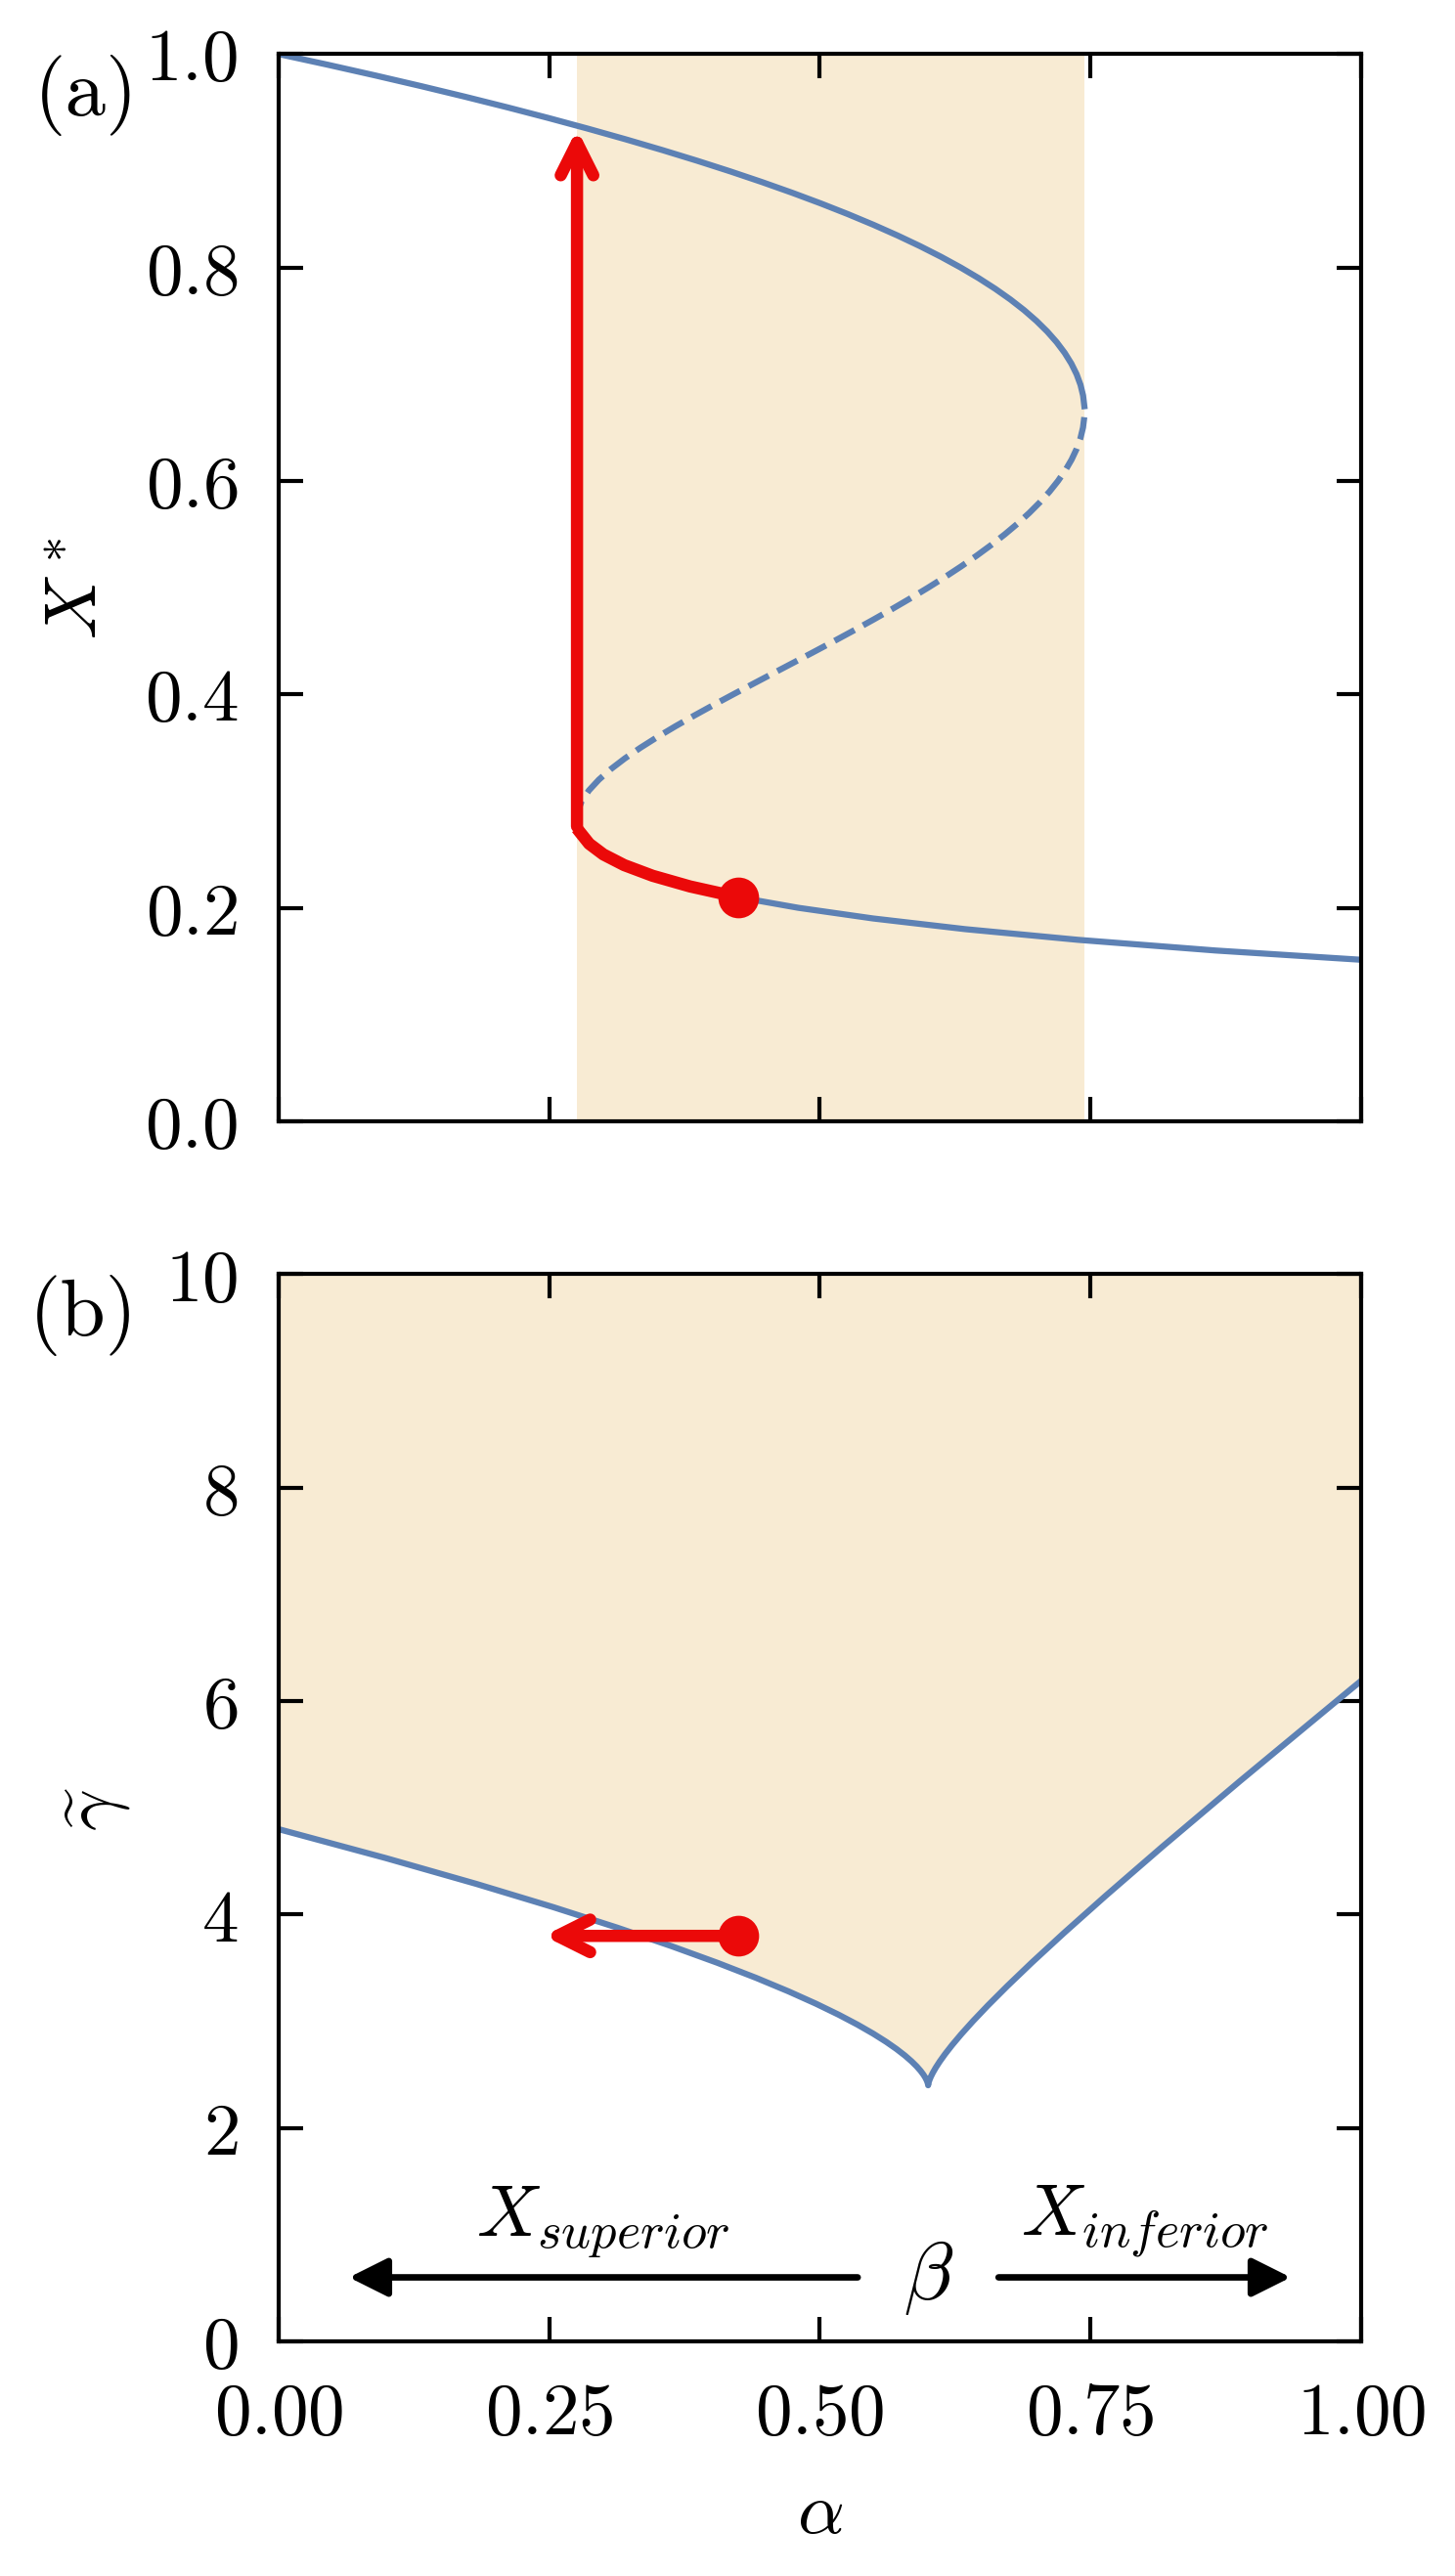

In [4]:
# One parameter bifurcation diagram for alpha
one_para_alpha = bfc.bifurcation_alpha(x_range, beta, gamma, M)
# Two parameter bifurcation diagram for alpha and gamma
two_para_alpha, two_para_gamma, h_1, h_2 = bfc.one_patch_2p_bifurcation(x_range, beta, M)

a = 2.7
bfc.plot_one_patch_bifurcation_diagram(x_range, one_para_alpha, two_para_alpha, two_para_gamma, beta,
                                figsize=(a, a*1.7), gridspec_kw={'wspace':0.0}, 
                                path="figures", filename="single_patch_bifurcation.pdf")

### **Figure A1**
Phase Portrait and Conditions for Bifurcation DIagram

In [5]:
# Fig. A1 (a)
alpha_vals = [0, 0.3, 0.3]
beta_vals = [0, 0.3, 0.6]
gamma_vals = [2, 1, 4.5]
M = 1.0

# Fig A1 (b), handle functions and parameters are reused from above
h_1 = h_1(x_range, beta, gamma, M)
h_2 = h_2(x_range, beta, gamma, M)

/Users/tim/Library/CloudStorage/GoogleDrive-tim.mauch1@gmail.com/My Drive/Wissen/Master Thesis/Veröffentlichung/Python Code/bifurcation.py:421: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


File phase_portrait.pdf already exists in figures, skipping save.


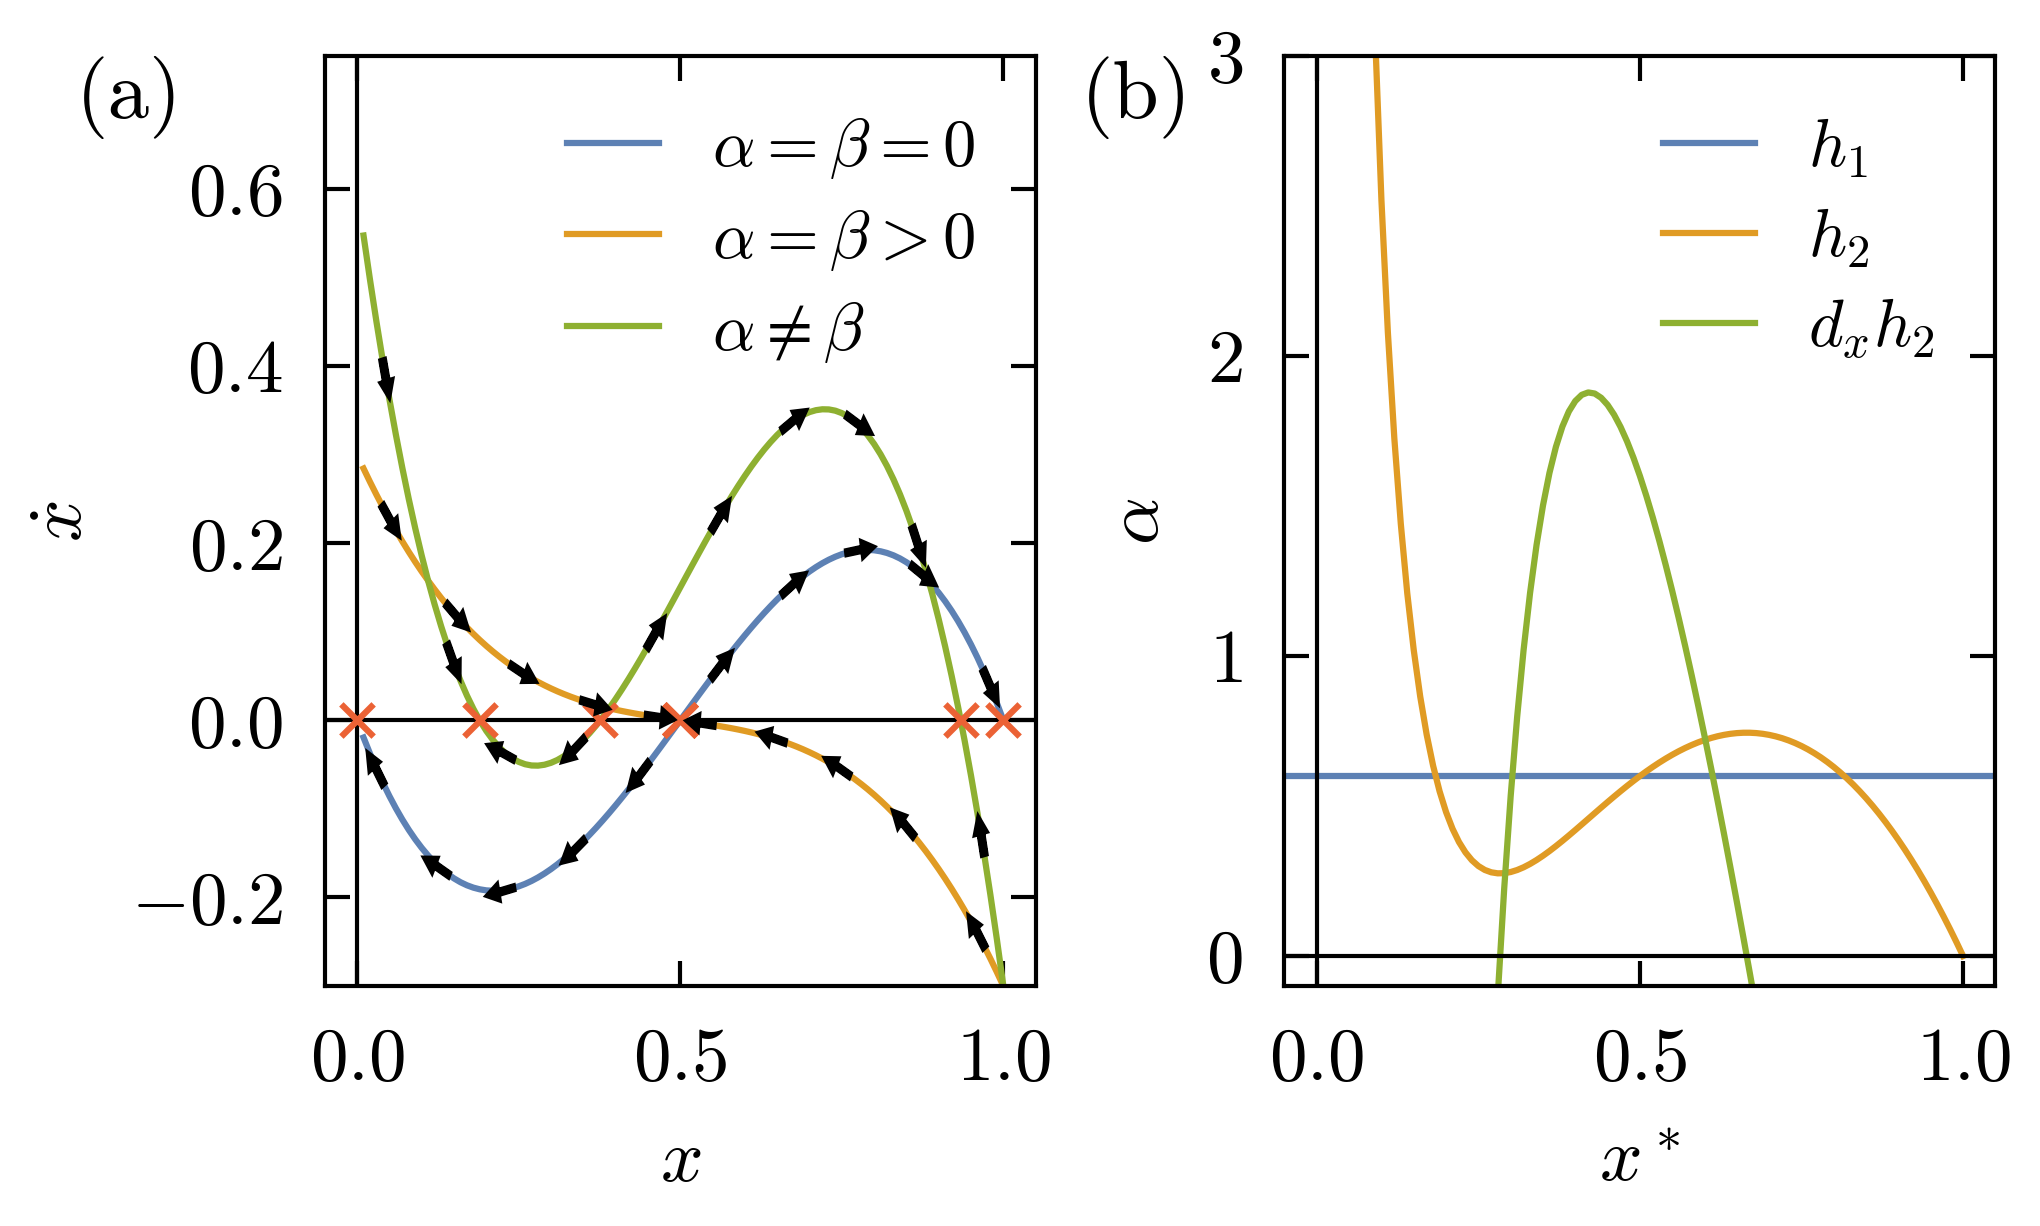

In [6]:
bfc.plot_phase_portraits(x_range, alpha_vals, beta_vals, gamma_vals, M, h_1, h_2,
                         figsize=((3+3/8), 2), gridspec_kw={'wspace':0.35}, 
                         path="figures", filename="phase_portrait.pdf")

### **Figure 1**
The time series was only included in the first version of the mansucript. The network is used in Figure 1.

Lalacian Matrix Eigenvalues are: [-0.      0.4131  1.1369  2.3595  3.6977  4.3928]
Critical value for kappa: 0.6407
Any Laplacian Eigenvalue below kappa? True


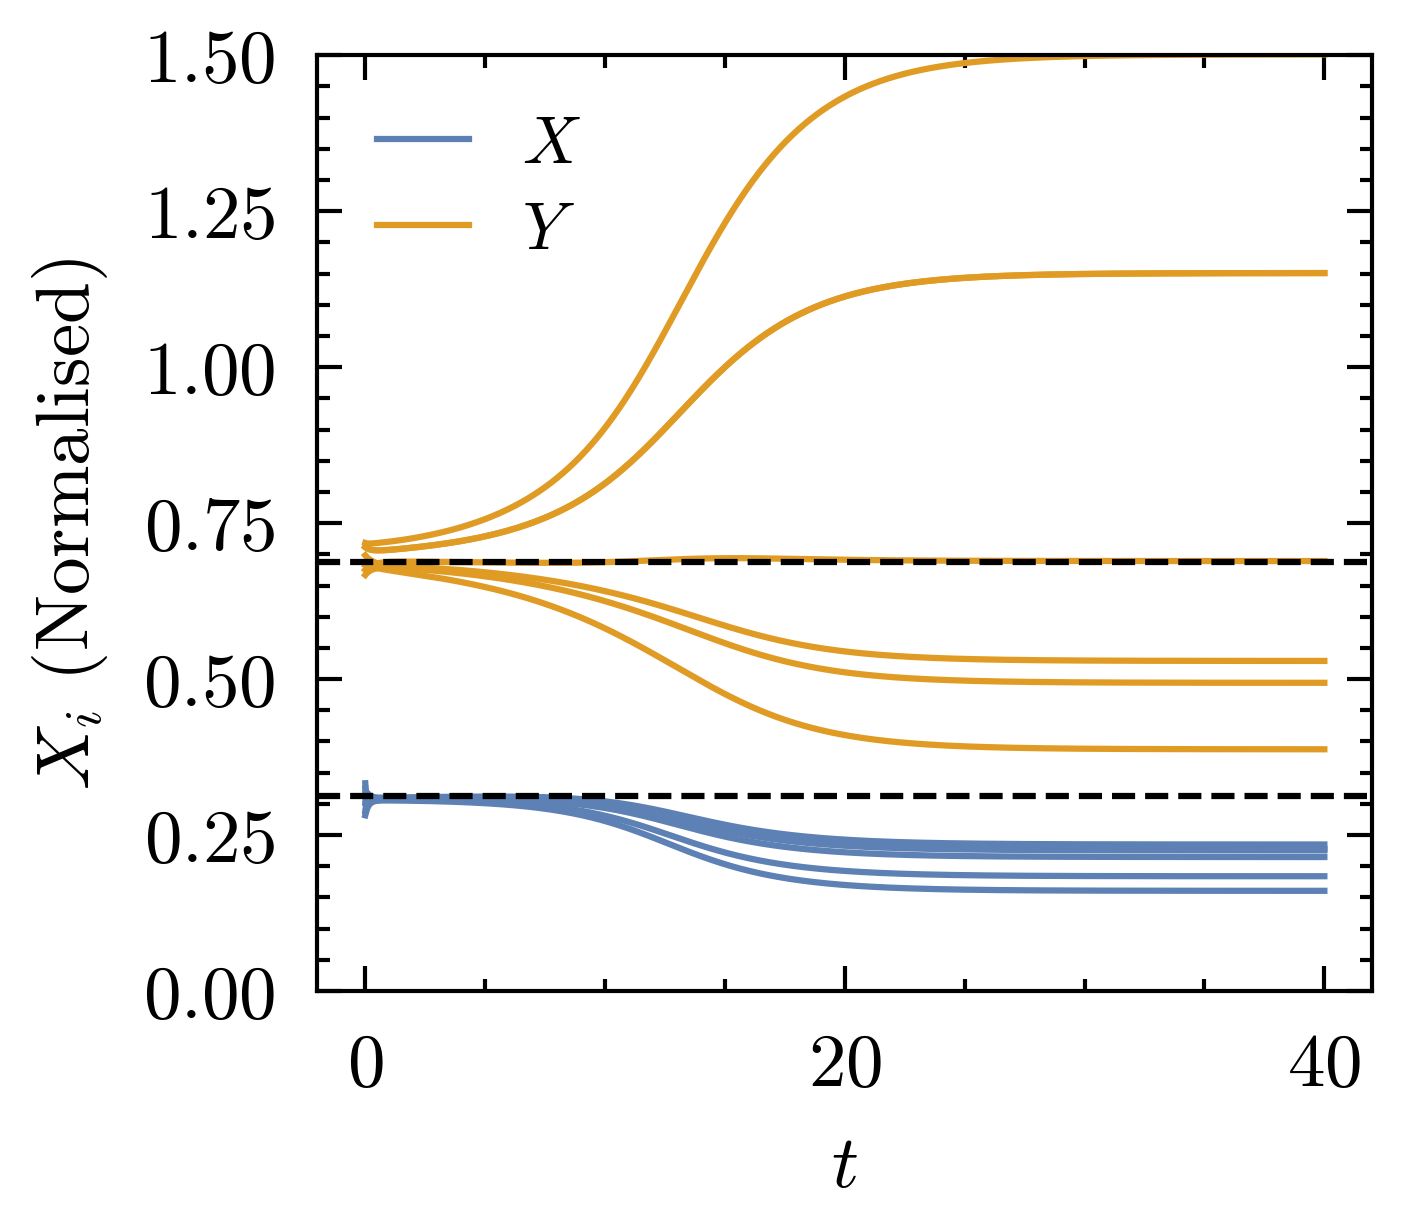

In [25]:
# Define underlying network structure
A = np.array([[0, 1, 1, 0, 0, 1],
              [1, 0, 1, 0, 1, 0],
              [1, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1],
              [0, 1, 0, 0, 0, 0],
              [1, 0, 0, 1, 0, 0]])

G = nx.from_numpy_array(A)

# set local parameter tuple
local_params = (0.6, 0.8, 0.02, 15, 1, 15)
alpha, beta, gamma, mu_x, mu_y, M = local_params
x_root_idx = 0 # index of the root of opinion X to initialize around
t = np.linspace(0, 40, 10**6)

# Find roots and check if pattern formation conditions are met
roots = om.roots_symbolic(alpha, beta, gamma, M)
x_root = roots[x_root_idx]
y_root = M - x_root
_ = sim.pattern_conditions(A, local_params, x_root, y_root)

# Draw initial conditions and integrate system
z0 = sim.initial_conditions(A, local_params, x_root, y_root, noise_strength=1, int_noise=False, seed=15)
solution = sim.run_simulation(t, z0, x_root, y_root, local_params, A, normalize=True, figsize=(1.7*1.5, 1.5*1.5), path=None, ylim=[0,1.5])

No path specified, figures not saved.


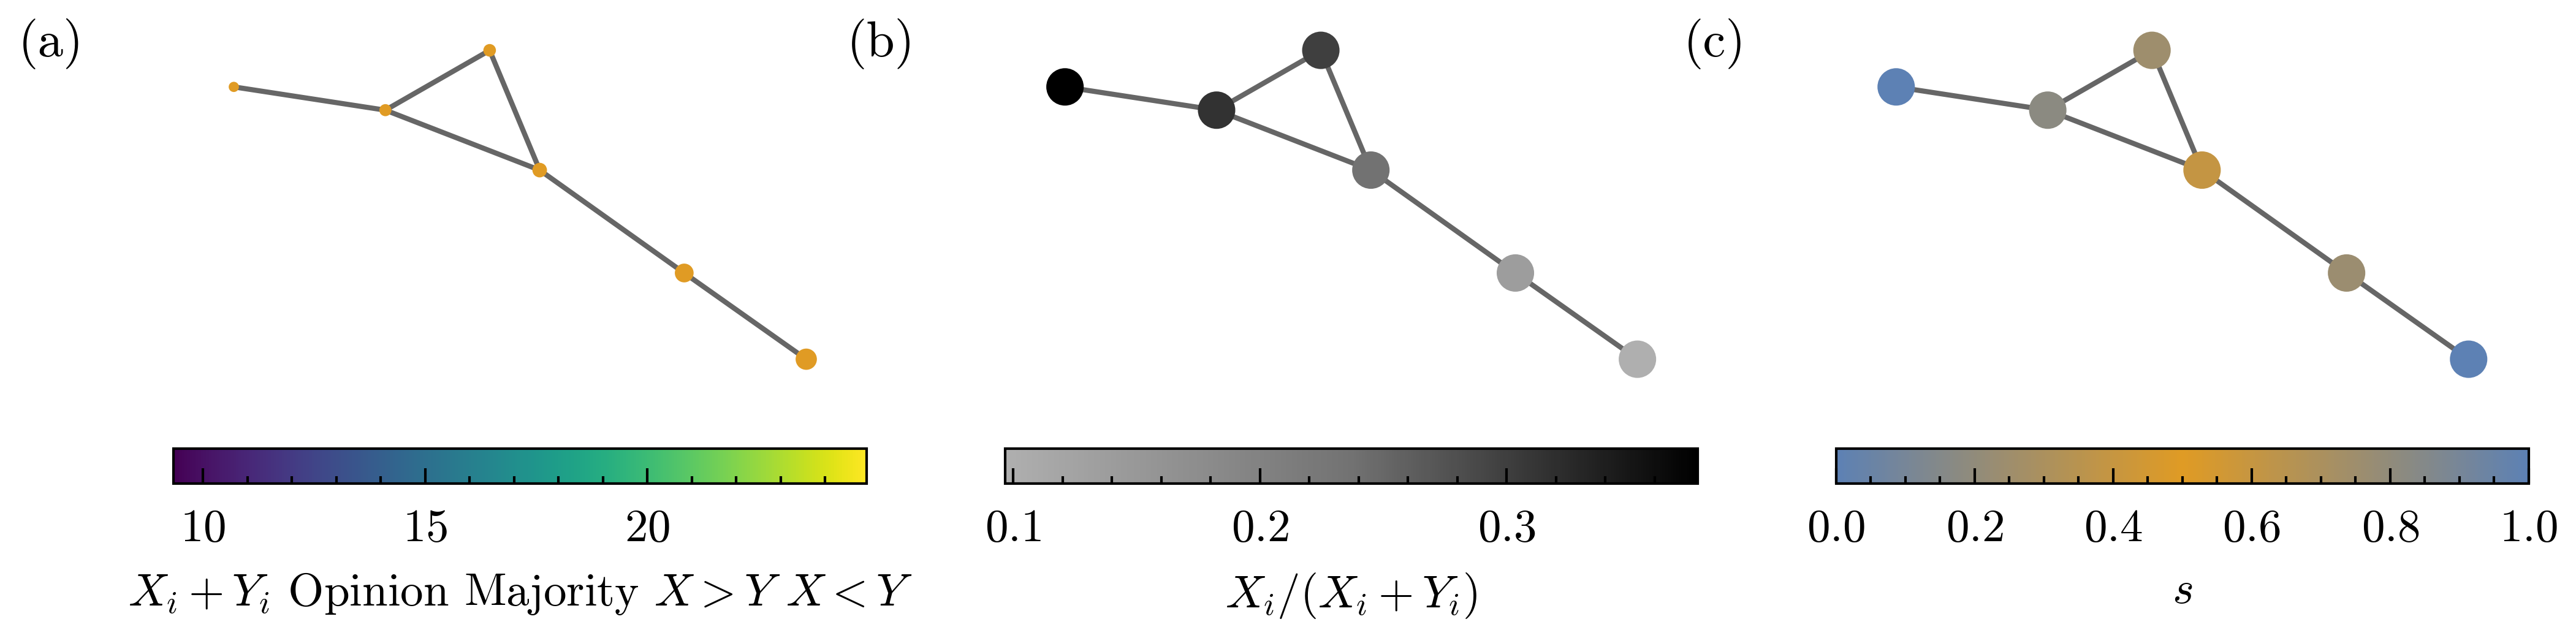

In [8]:
sim.draw_graph_dist(G, t, solution, frames=[-1], size_scale=[40,10], layout="spring", path=None, seed=15)

### **Figure 3**
Master Stability Function

In [9]:
M = 15
x_root_idx = 0
kappa_vals = np.linspace(-1.5,1,1000) # range of laplacian eigenvalues

alpha_vals = [0.6, 0.6, 0.55, 0.3]
beta_vals  = [0.6, 0.6, 0.6, 0.6]
gamma_vals = [0.005, 0.005, 0.01, 0.02]
mu_x_vals  = [1, 5, 5, 15]
mu_y_vals  = [1, 1, 1, 1]
M_vals = [15] * 4

param_list = [alpha_vals, beta_vals, gamma_vals, M_vals, mu_x_vals, mu_y_vals]

File master_stability_function.pdf already exists in figures, skipping save.


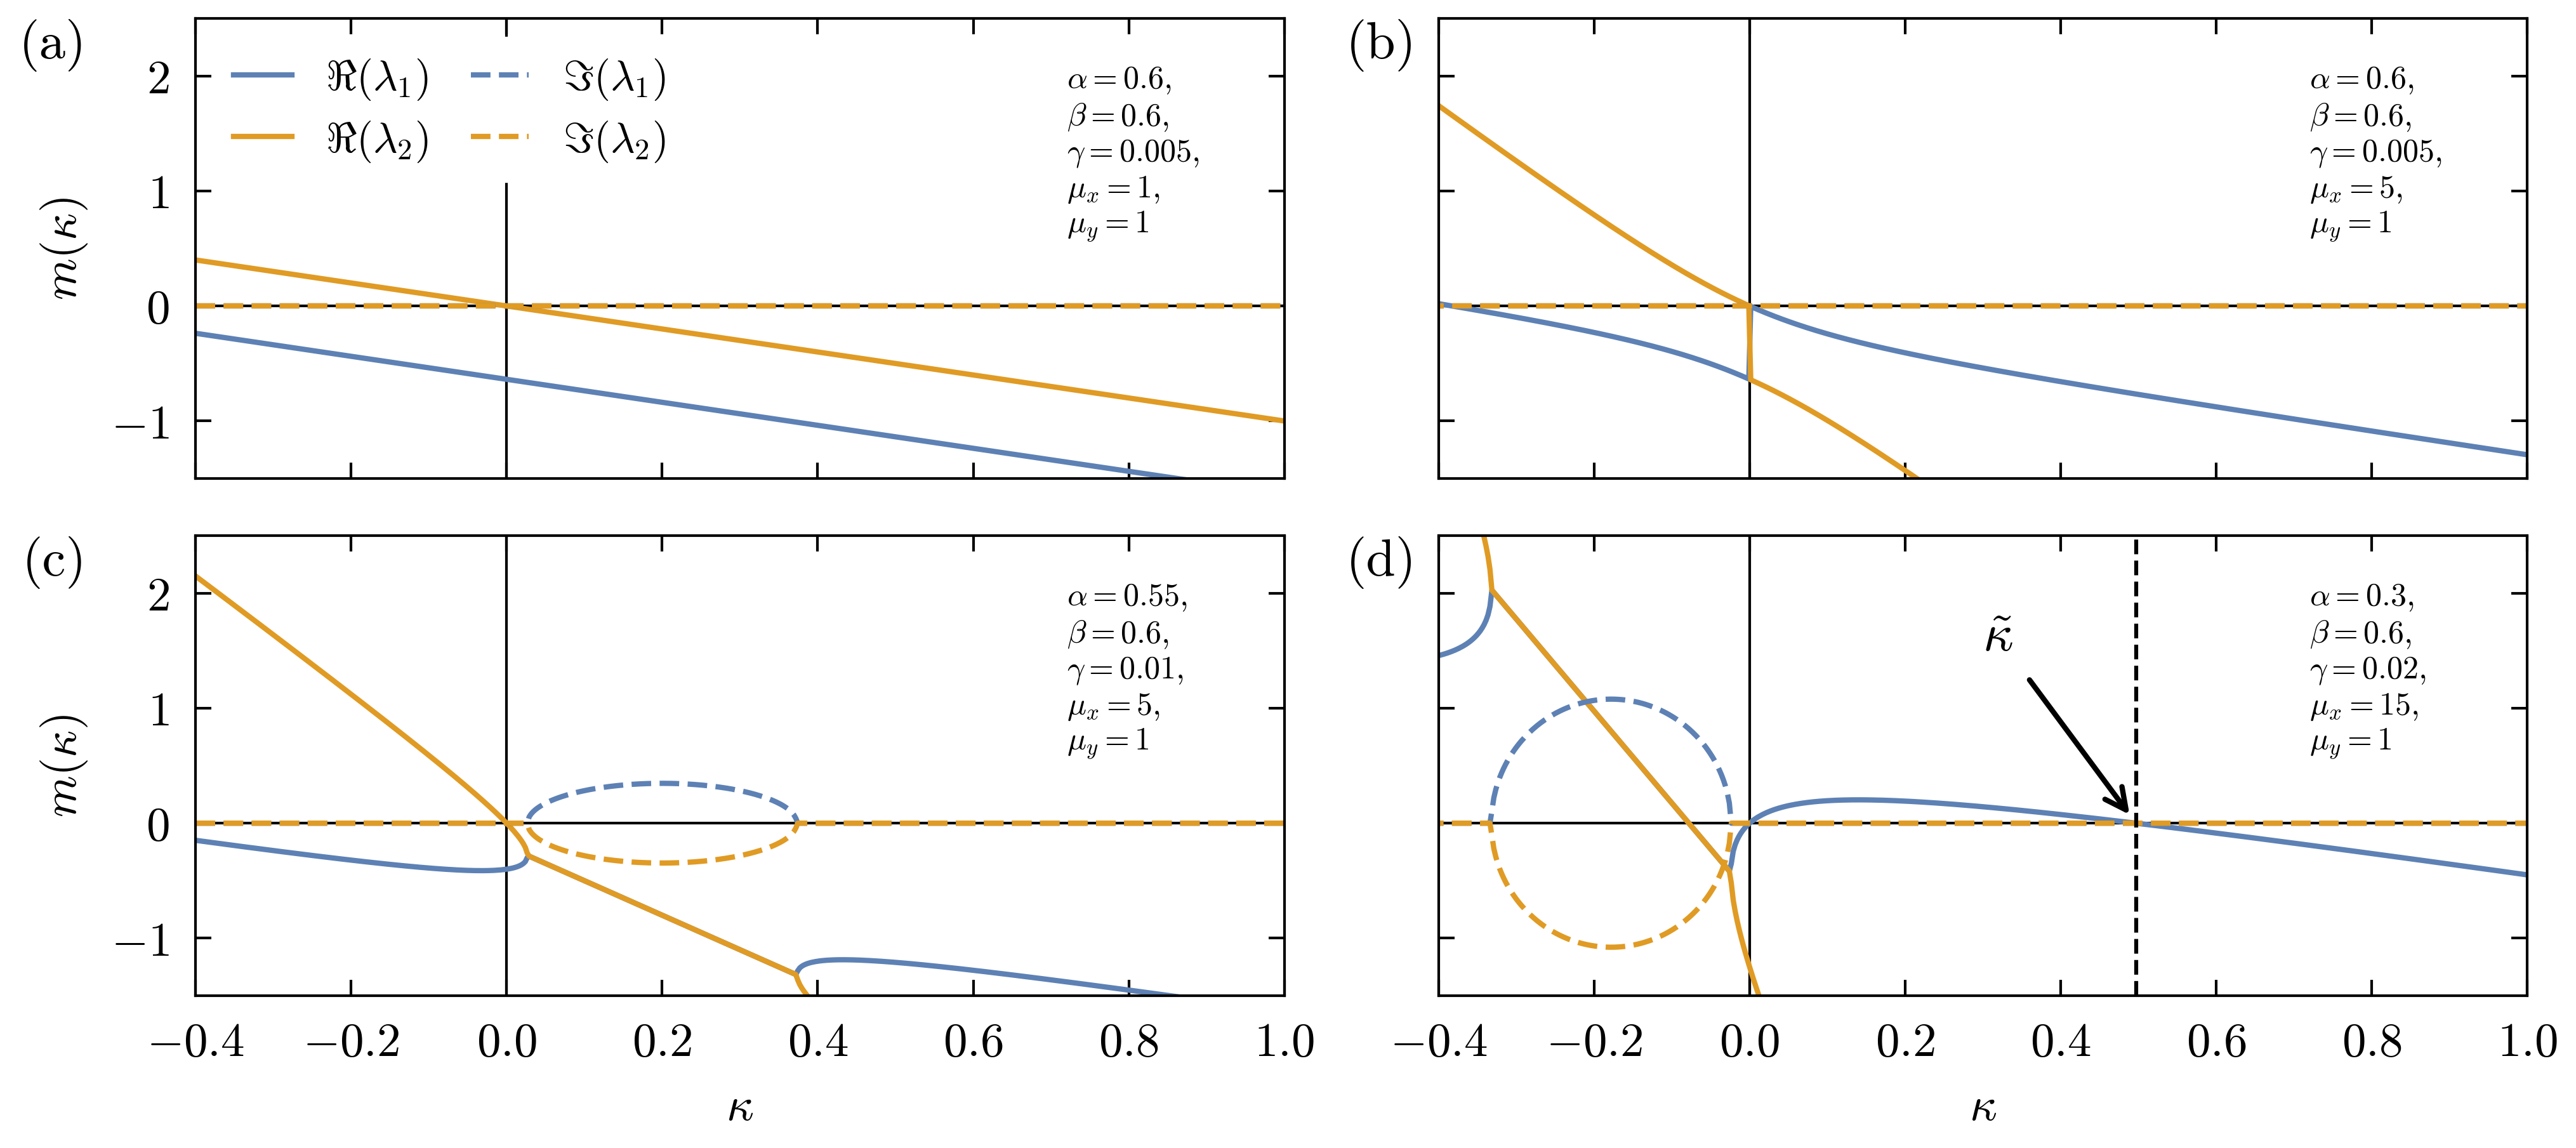

In [10]:
real_eigvals, im_eigvals, intersect = bfc.master_stability_function(alpha_vals, beta_vals, gamma_vals, 
                                                                    mu_x_vals, mu_y_vals, kappa_vals, x_root_idx, M)
bfc.plot_master_stability_function(kappa_vals, real_eigvals, im_eigvals, intersect, param_list,
                                   xlim=[-0.4,1], ylim=[-1.5,2.5], figsize=((3+3/8)*2, 1.5*2), gridspec_kw={'wspace':0.0,'hspace':0.1},
                                   path="figures", filename="master_stability_function.pdf")

### **Figure 4**
Turing bifurcation in two parameter bifurcation diagram.

In [11]:
data_folder = Path("figures")
file_path = data_folder / "max_msf_eigv.npy"
if file_path.exists():
    max_msf_eigv = np.load(file_path, allow_pickle=True)
    print(f"Loaded from: {file_path}")
else:
    max_msf_eigv = [None]
    print(f"Max Eigval Experiment needs to be conducted")

Loaded from: figures/max_msf_eigv.npy


In [12]:
beta_eval = 0.6
M_eval = 15
mu_x_eval = [1, 15] # first value for axis 1, second value for axis 2
mu_y_eval = [15, 1] # first value for axis 1, second value for axis 2
kappa_ax_1 = np.linspace(0.05,1,5) # mu_y > mu_x
kappa_ax_2 = [0.05] # mu_x > mu_y
kappa_vals = [kappa_ax_1, kappa_ax_2]
x_range = np.linspace(0.0, M_eval, 2000)

alpha_vals = np.linspace(0, 1.5, 100)
gamma_vals = np.linspace(0, 0.06, 100)
if None in max_msf_eigv:
    max_msf_eigv = bfc.alpha_gamma_msf_eigv(alpha_vals, gamma_vals, beta_eval, M_eval, mu_x_eval[1], mu_y_eval[1], x_root_idx=0, kappa_vals=kappa_ax_2)
    data_folder.mkdir(parents=True, exist_ok=True)
    np.save(file_path, max_msf_eigv)

File RGG_master_stability_function.svg already exists in figures, skipping save.


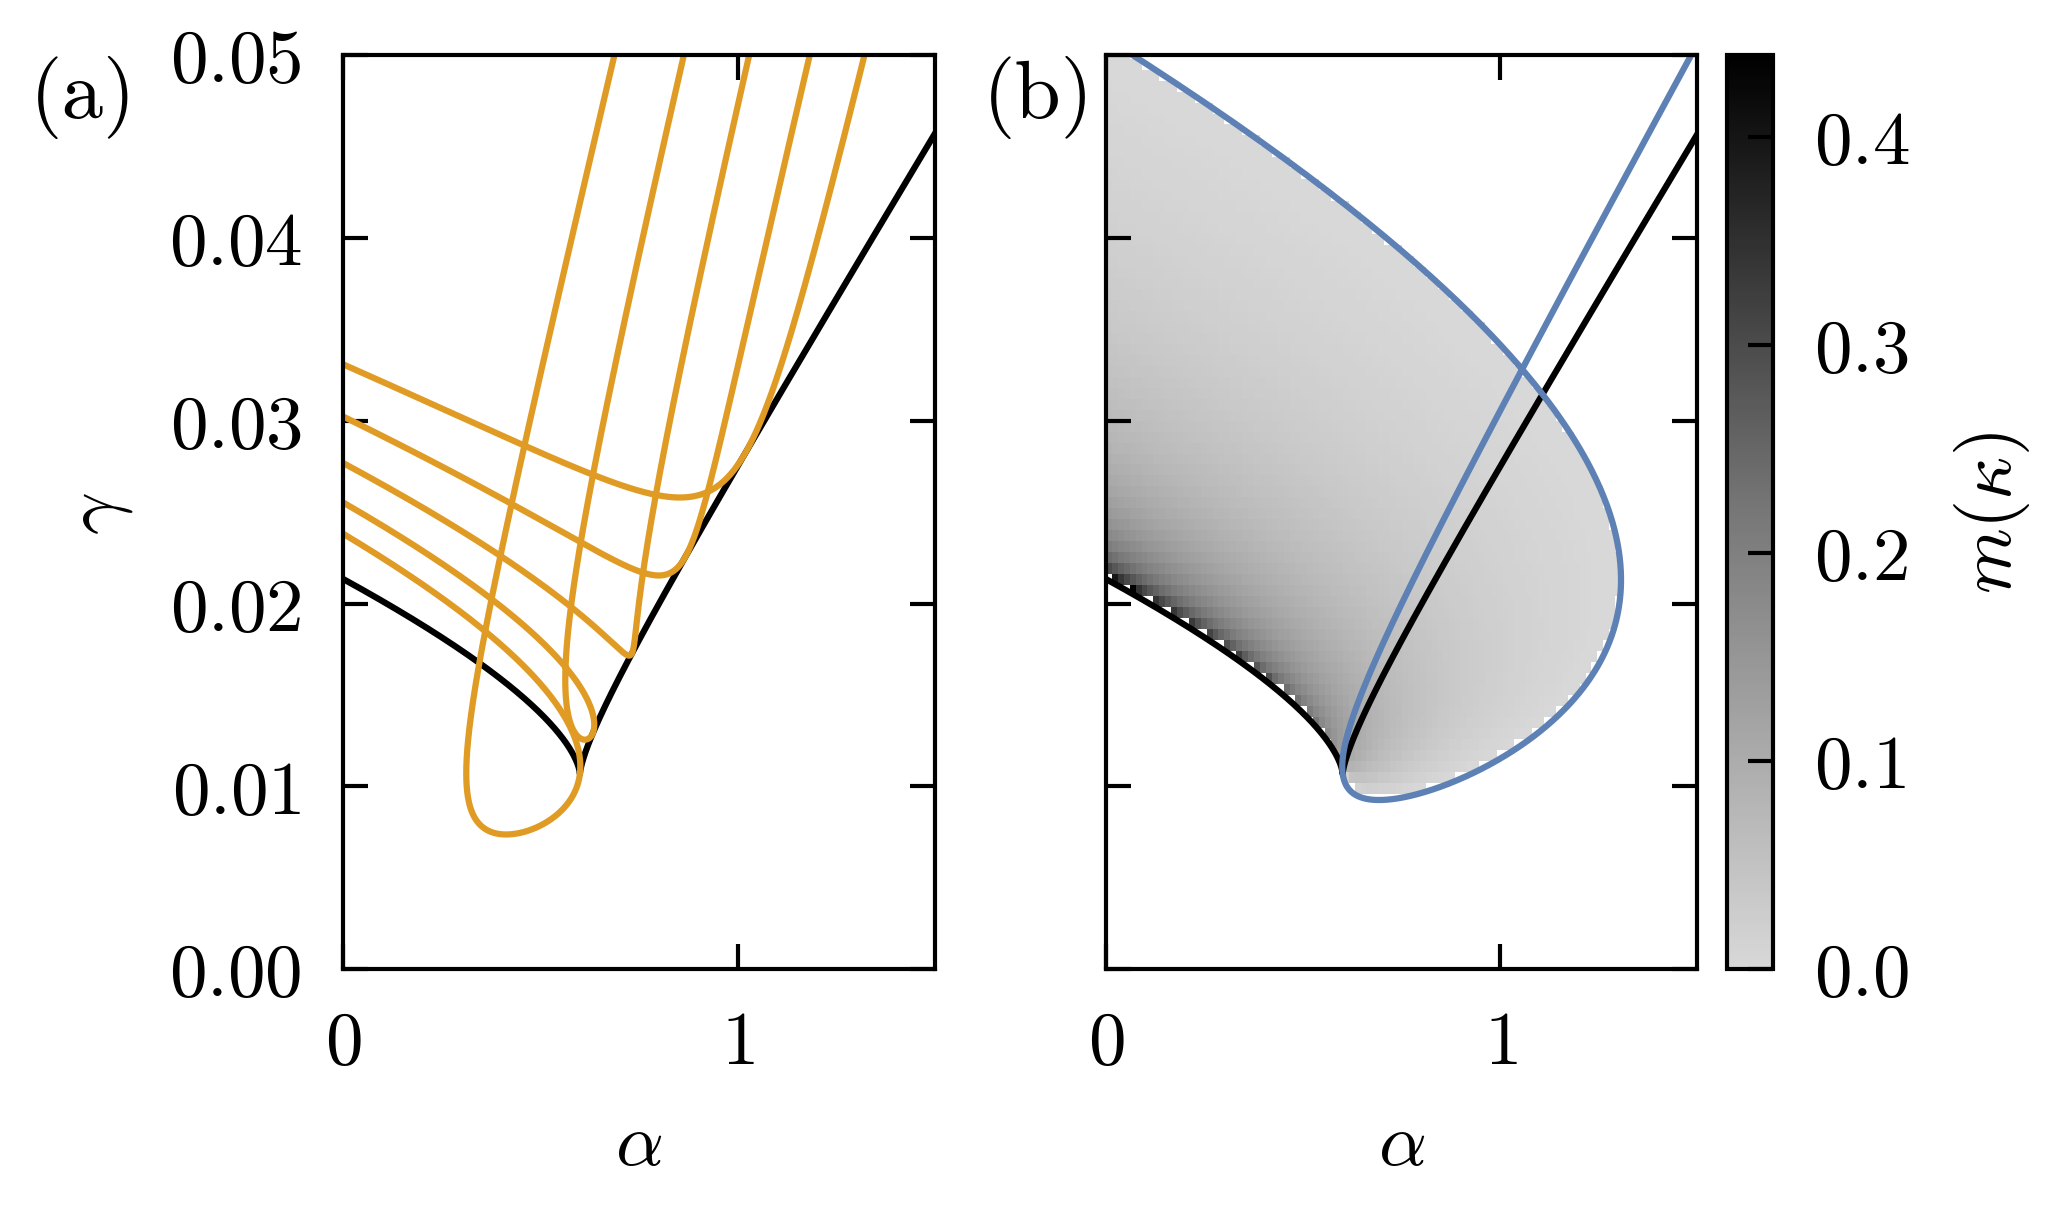

In [13]:
max_msf_eigv[max_msf_eigv==0] = np.nan
bfc.plot_multi_patch_2p_bifurcation_diagram(x_range, beta_eval, M_eval, mu_x_eval, mu_y_eval, kappa_vals, 
                                            alpha_vals, gamma_vals, max_msf_eigv,
                                            xlim=[0,1.5], ylim=[0,0.05], figsize=((3+3/8), 2), gridspec_kw={'wspace':0.0}, 
                                            path="figures", filename="RGG_master_stability_function.svg")

### **Figure 5**
Simulations on random geometric graph.

In [14]:
data_folder = Path("figures")
file_path = data_folder / "num_flipped_nodes_RGG.npy"
if file_path.exists():
    flipped_nodes = np.load(file_path, allow_pickle=False)
    print(f"Loaded from: {file_path}")
else:
    flipped_nodes = [None]
    print(f"Flipped nodes Experiment needs to be conducted")

Loaded from: figures/num_flipped_nodes_RGG.npy


In [15]:
# RGG parameters
patches = 50
connectivity = 0.2
# Model parameters
local_params = (0.35, 0.6, 0.03, 15, 1, 15)
alpha, beta, gamma, mu_x, mu_y, M = local_params
x_root_idx = 0 # index of the root of opinion X to initialize around

# Iteration values for parameter space node flipping representation
alpha_vals = np.linspace(0, 1.5, 100)
gamma_vals = np.linspace(0, 0.06, 100)
# x_range = M * np.linspace(0, 1, 1000)**2
a = 10
x_range = M * (np.exp(a*np.linspace(0, 1, 2000)) - 1) / (np.exp(a) - 1)

# alpha and gamma values that should be represented in the msf plot (and indicated in 2p bifurcation space)
alpha_msf = [0.1, 0.3, 0.3]
gamma_msf = [0.03, 0.025, 0.018]
num_L_eigv = 4 # number of laplacian eigenvalues (excluding zero eigenvalue) that are considered in plot

# Integration settings
t = np.linspace(0, 200, 10**3)

In [16]:
# Find appropriate graph structure
seed = 30

G = nx.from_numpy_array(np.array([[0,0],[0,0]]))
while nx.is_connected(G)==False:
    seed += 1
    G = nx.random_geometric_graph(patches, connectivity, seed=seed)
    # G = nx.watts_strogatz_graph(patches, 3, 0.2, seed=seed)
A = nx.to_numpy_array(G)
print(f'Found Graph with {patches} patches connectivity={connectivity} for seed={seed}')

Found Graph with 50 patches connectivity=0.2 for seed=41


In [17]:
if None in flipped_nodes:
    flipped_nodes, solutions, max_eigvals = sim.flipping_parameter(A, t, alpha_vals, gamma_vals, beta, M, mu_x, mu_y, x_root_idx, seed=10)
    data_folder.mkdir(parents=True, exist_ok=True)
    np.save(file_path, flipped_nodes)

File multi_patch_bifurcation_diagram.svg already exists in figures, skipping save.


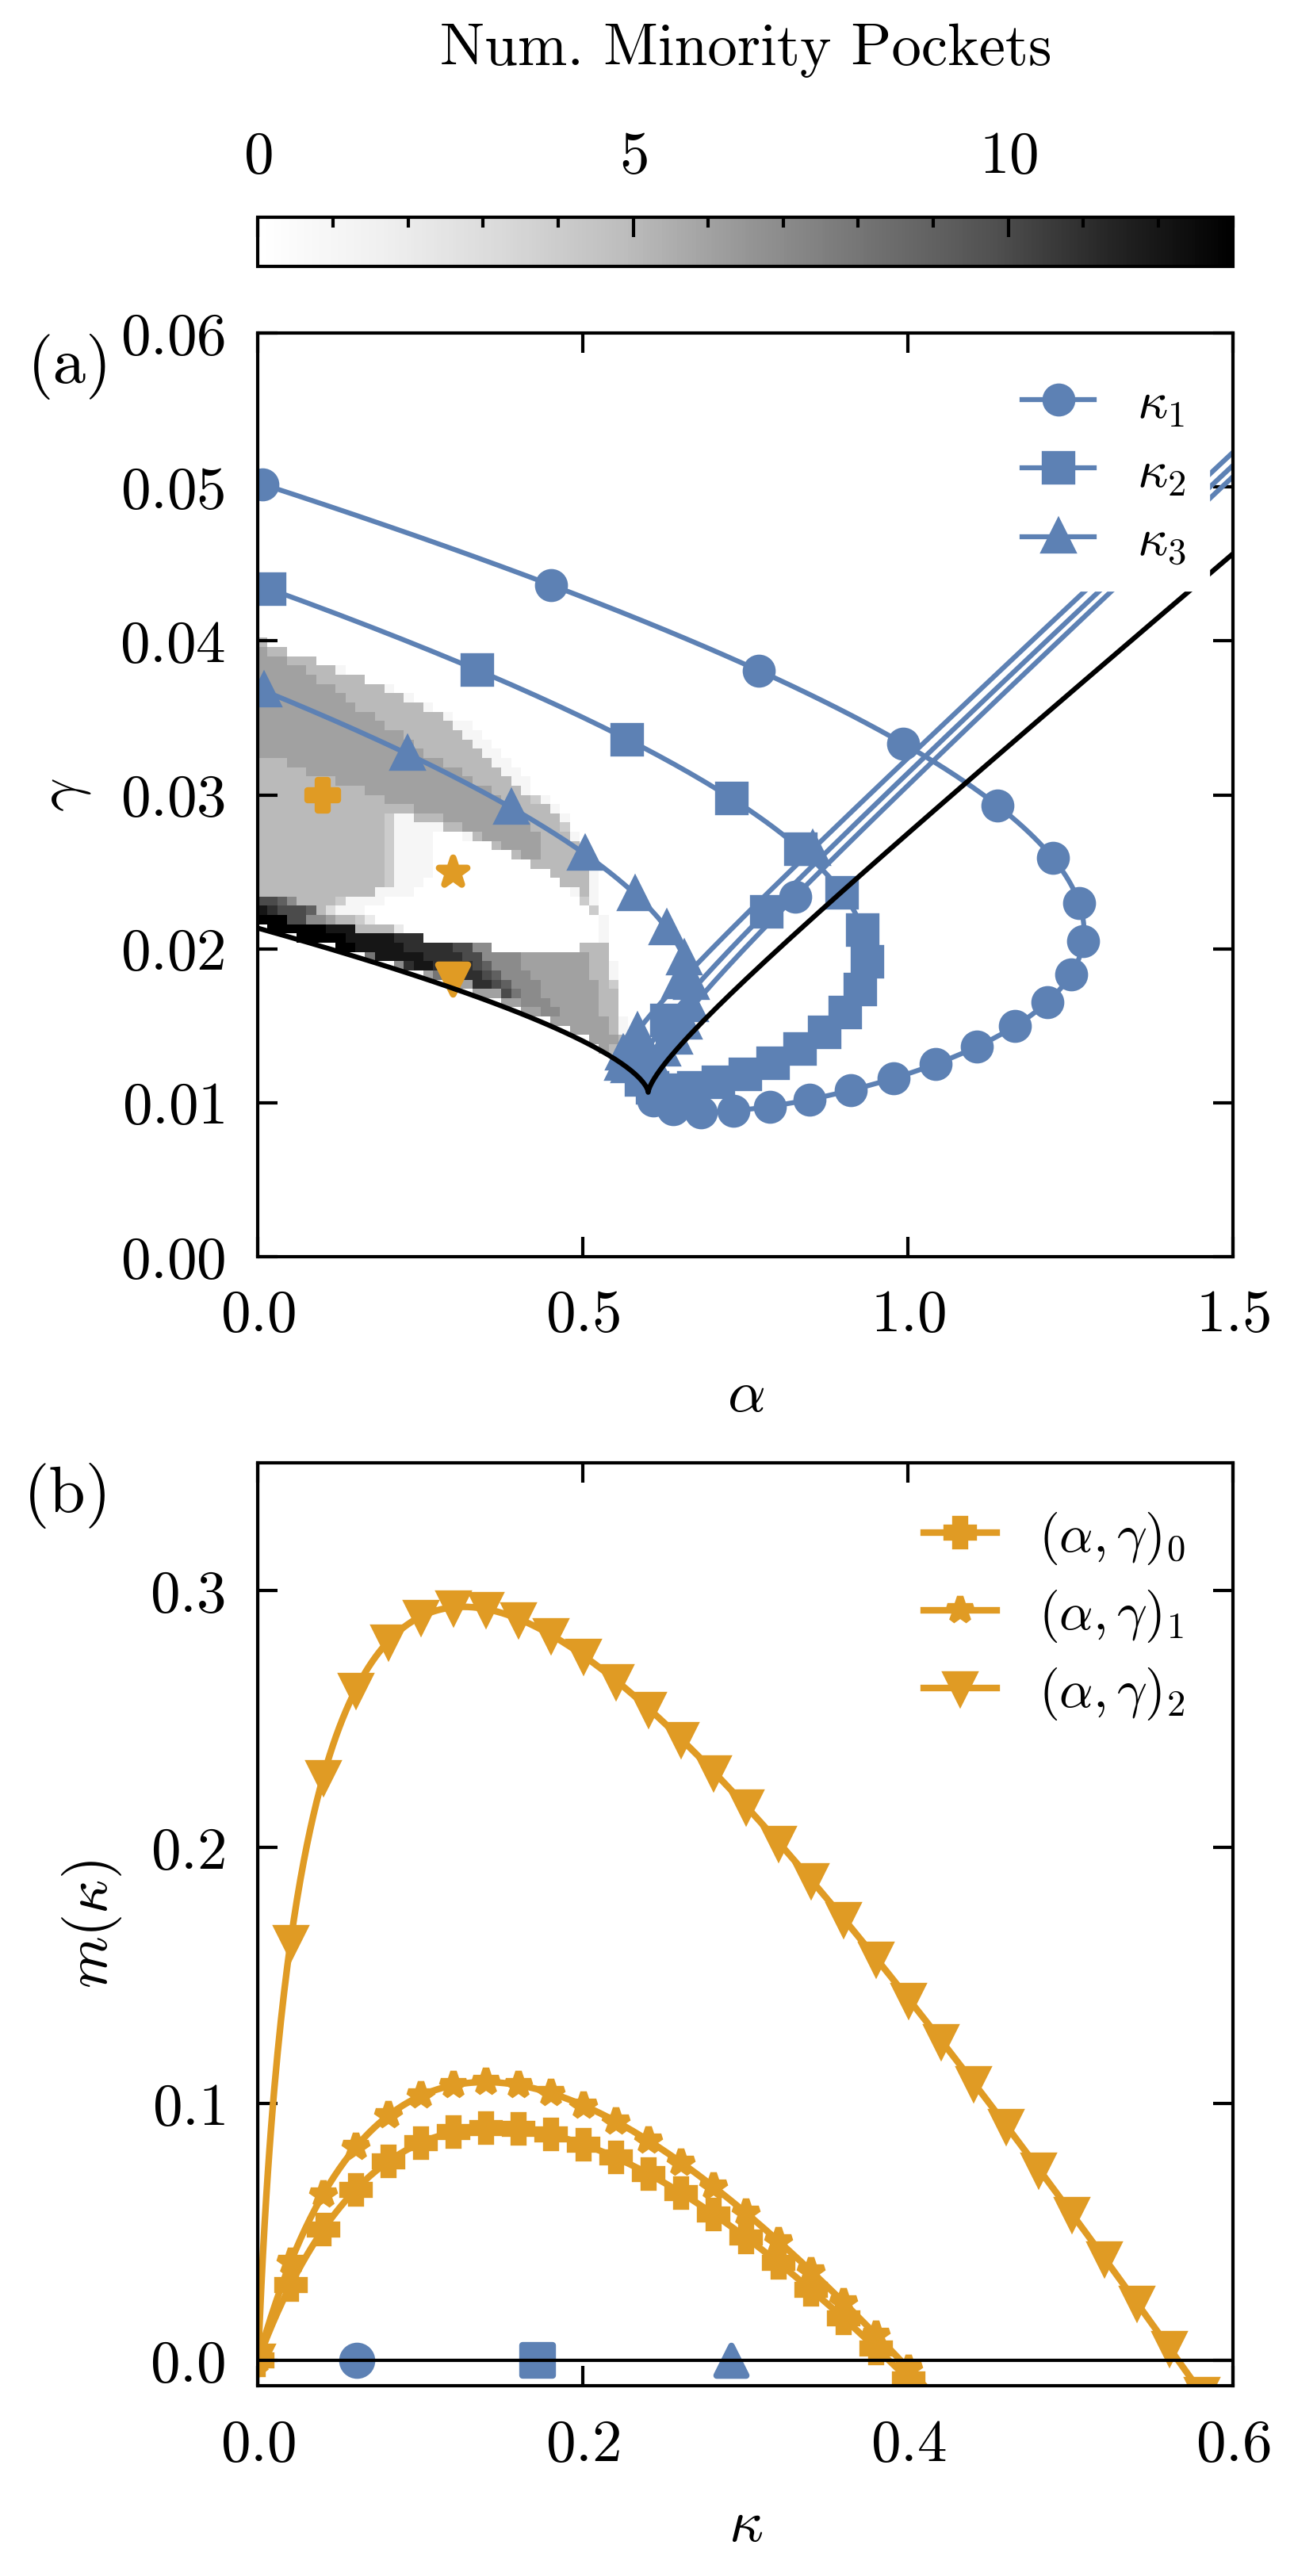

In [18]:
a = 2.7
figsize = (a, 2*a)
xlim = [[0.0,1.5],[0,0.6]]
ylim = [[0.00,0.06],[-0.01,0.35]]
sim.plot_flipping(A, x_range, alpha_vals, gamma_vals, beta, M, mu_x, mu_y, num_L_eigv,
                flipped_nodes, alpha_msf, gamma_msf, x_root_idx,
                xlim=xlim, ylim=ylim, 
                figsize=figsize, gridspec_kw={'wspace':0.0}, 
                path="figures", filename="multi_patch_bifurcation_diagram.svg")

### **Figure 6**

In [19]:
# numerically integrate the model with parameters as defined above
flipped_nodes_plt, solutions_plt, max_eigvals_plt = sim.flipping_parameter(A, t, alpha_msf, gamma_msf, beta, M, mu_x, mu_y, x_root_idx, seed=10, int_noise=True)

In [20]:
# choose iteration and extract parameters
iteration = 0 # choose the iteration from the previous experimetn that should be plotted
alpha, gamma, kappa_crit = list(solutions_plt.keys())[iteration]
local_params = (alpha, beta, gamma, mu_x, mu_y, M) 
sol = solutions_plt[list(solutions_plt.keys())[iteration]]
max_eigval = max_eigvals_plt[list(max_eigvals_plt.keys())[iteration]]
# extract initial values
z0 = sol[0,:]

In [ ]:
# Gillepsie parameters
steps = 2000000
cycles = 20

t_result, x_result, y_result = sim.gillespie_algorithm(cycles, steps, z0, A, local_params)

In [ ]:
# Extract Gillespie Results
# Calculate probability of node being flipped over all cycles
time_idx = 1950000 # calculate mean X steps to wait for convergence
node_flip_probab = np.zeros(patches)
gillespie_size = np.zeros(patches)

for i in range(cycles):
    mean_nodes_x = x_result[i, time_idx:].mean(axis=0)
    mean_nodes_y = y_result[i, time_idx:].mean(axis=0)
    gillespie_size += (mean_nodes_x + mean_nodes_y)
    flipped_idx = np.where(mean_nodes_x>mean_nodes_y)[0]
    node_flip_probab[flipped_idx] += 1

# Calculate final probability
node_flip_prob = node_flip_probab/cycles
gillespie_size = gillespie_size/cycles

Plotting Parameter Combination alpha=0.1, gamma=0.03


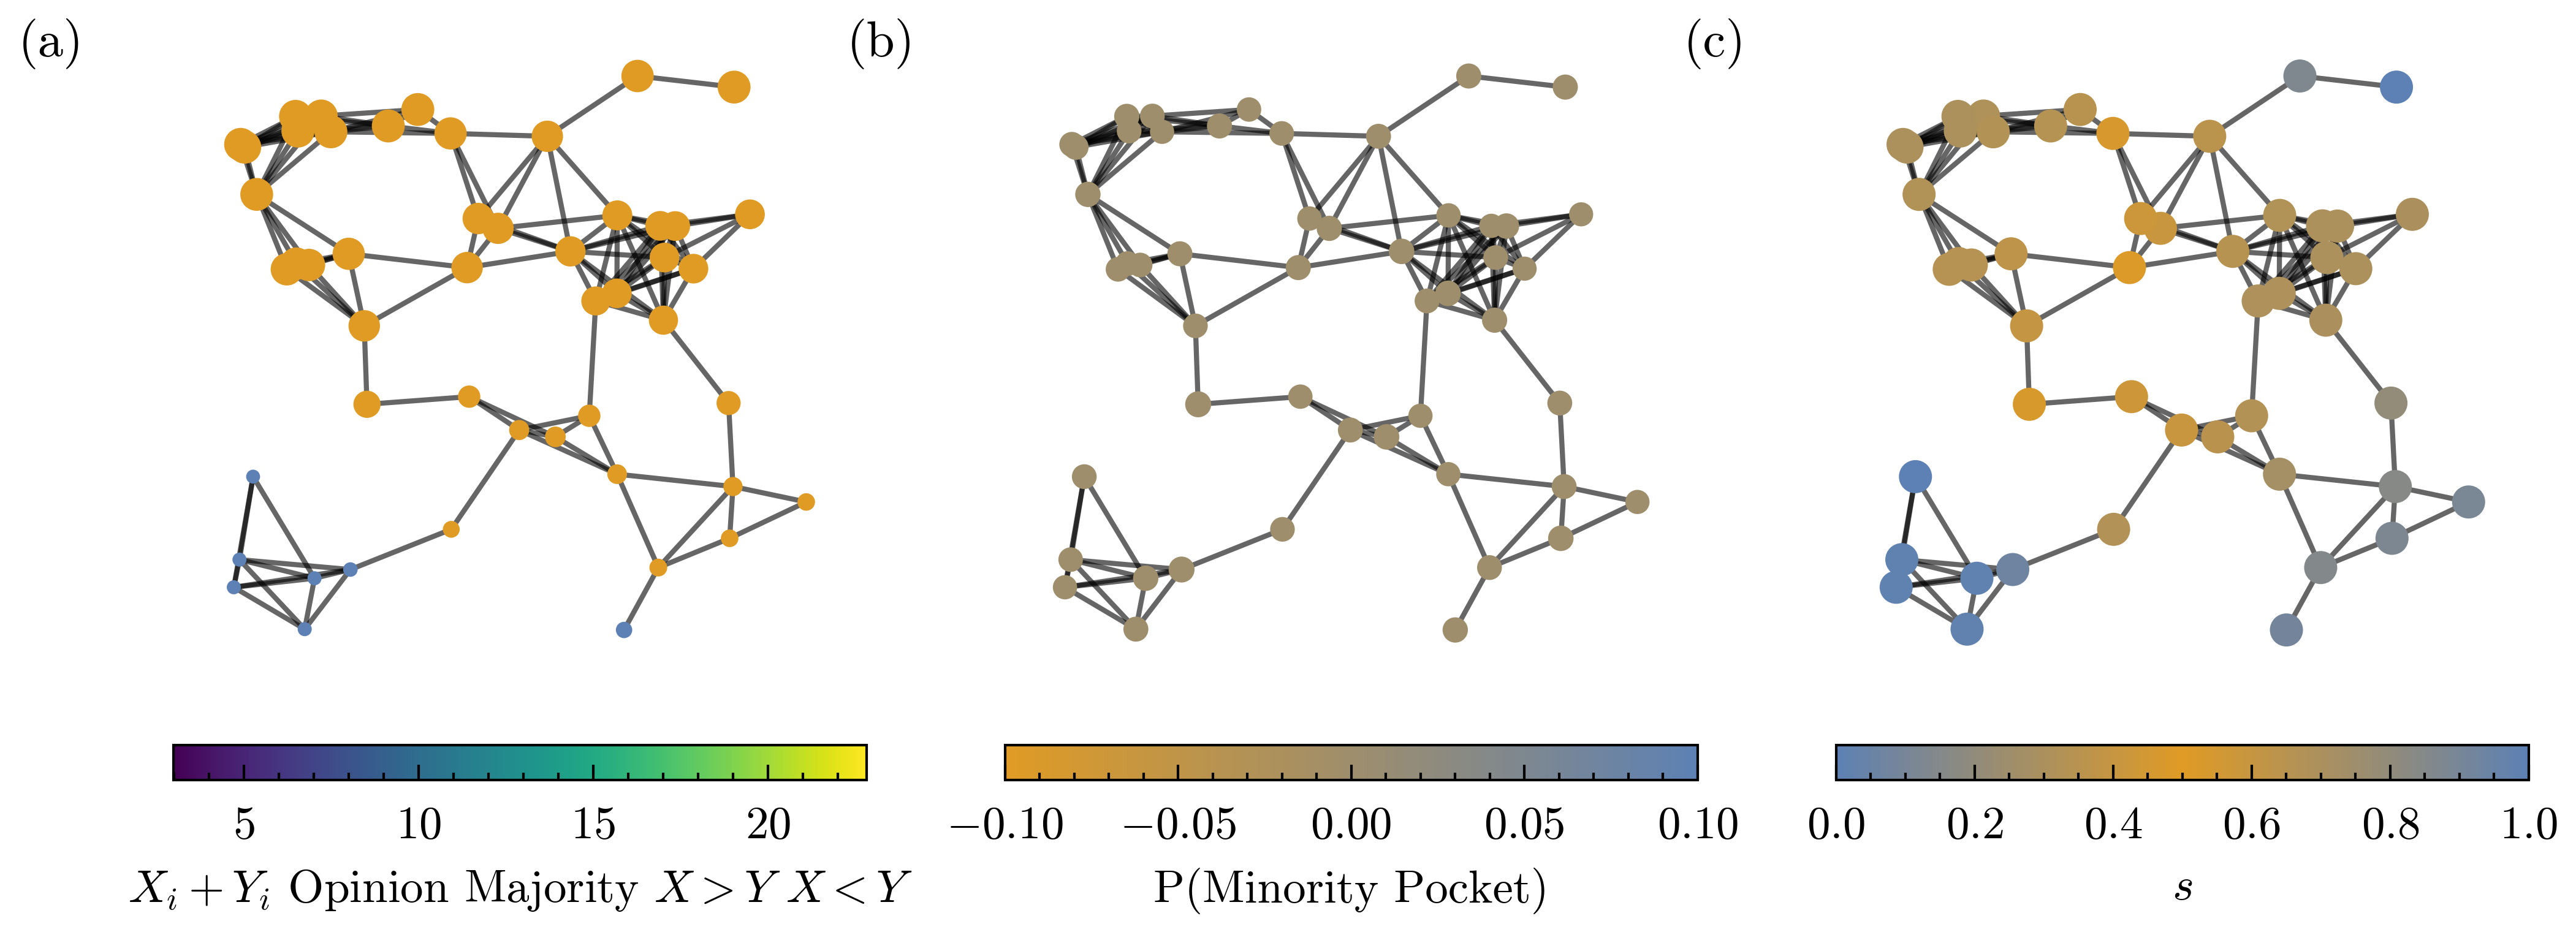

In [24]:
print(f'Plotting Parameter Combination alpha={alpha}, gamma={gamma}')
sim.draw_graph_dist(G, t, sol, frames=[1,2,-1], size_scale=[30,30], layout="RGG", 
                    path="figures", seed=20, laplace_eigv=kappa_crit, prop="Y", weights=max_eigval, kappa_0=True, gillespie=(node_flip_prob, gillespie_size))